##### Inmaculada Marín Carballo

Matrikel-Nr.3086148

##### Pilar Navarro Ramírez  

Matrikel-Nr.3086150

# Hausübung

<div class="task_description">
    <i class="task">Homework 7.1:</i>
        ::: 10 Hausaufgabenpunkte :::</div>
Develop a Language Identification System based on the code below.
The classifier used must not be changed.
However, you may use other features and change/expand the database.

We changed the parameters of the CountVectorizer so that it selects the characters (1 or 2 characters) instead of the words. It also converts the characters to lowercase, although this option was the default. Moreover, we added some more data to the database to train the system that we got from http://www.cs.cmu.edu/~ralf/langid.html and from the European Parliament https://www.statmt.org/europarl/. This database is uploaded in a zip format together with the script.

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_files
from sklearn import metrics

# the training data folder must be passed as first argument
dataset = load_files("data/lid")

# split the dataset in training and test set:
n = dataset.filenames.shape[0]
split = int(n*0.8)

x_train = [open(f).read() for f in dataset.filenames[:split]]
x_test = [open(f).read() for f in dataset.filenames[split:]]

y_train = dataset.target[:split]
y_test = dataset.target[split:]

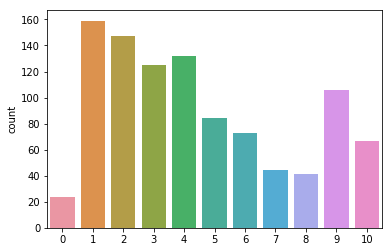

In [18]:
import seaborn as sns

# show the class distribution
# EXTRA BONUS POINT Opportunity: how to also show the class names here?
%matplotlib inline 
sns.countplot(data=dataset, x='target');

In [20]:
clf = Pipeline([
    ('vec', CountVectorizer(analyzer="char",ngram_range=(1, 2), lowercase=True)),
    ('clf', SVC()), # DO NOT CHANGE THIS CLASSIFIER!
])

# Fit the pipeline on the training set
clf.fit(x_train, y_train)

# Predict the outcome on the testing set
y_predicted = clf.predict(x_test)

# Print the classification report
print(metrics.classification_report(y_test, y_predicted, target_names=dataset.target_names))

# Plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

# Predict the result on some short new sentences:
sentences = [
    u'This is a language detection test.',
    u'Ceci est un test de détection de la langue.',
    u'Dies ist ein Test, um die Sprache zu erkennen.'
]
predicted = clf.predict(sentences)

print()

for s, p in zip(sentences, predicted):
    print(u'The language of "%s" is "%s"' % (s, dataset.target_names[p]))
    
#Please do not take this last result into account but the evaluation parameters and the confusion matrix shown before
#this last result. I do not know why it says that the language is japanese in all cases because even the letters are not 
#japanese, but the evaluation parameters show that the system works properly. I even try to use a sentence from the 
#training data to predict the language and it was predicted wrong. 

/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

          ar       1.00      1.00      1.00         4
          de       0.97      0.92      0.95        39
          en       0.97      0.97      0.97        32
          es       0.95      1.00      0.98        21
          fr       0.76      1.00      0.86        22
          it       1.00      0.82      0.90        17
          ja       1.00      1.00      1.00        15
          nl       1.00      0.82      0.90        11
          pl       1.00      1.00      1.00         6
          pt       1.00      0.96      0.98        23
          ru       1.00      1.00      1.00        11

    accuracy                           0.95       201
   macro avg       0.97      0.95      0.96       201
weighted avg       0.96      0.95      0.95       201

[[ 4  0  0  0  0  0  0  0  0  0  0]
 [ 0 36  1  0  2  0  0  0  0  0  0]
 [ 0  0 31  0  1  0  0  0  0  0  0]
 [ 0  0  0 21  0  0  0  0  0  0  0]
 [ 0  0  0  0 22  0  0  0  0  0  0]
 [ 0  0